<a href="https://colab.research.google.com/github/alfredwisana/deep-learning/blob/main/Week%206/caltech_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

import pickle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

from sklearn.model_selection import train_test_split

In [2]:
(train_data, test_data), ds_info = tfds.load(name="caltech101",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

In [3]:
class_names = ds_info.features["label"].names

In [4]:
train_data,test_data = test_data, train_data

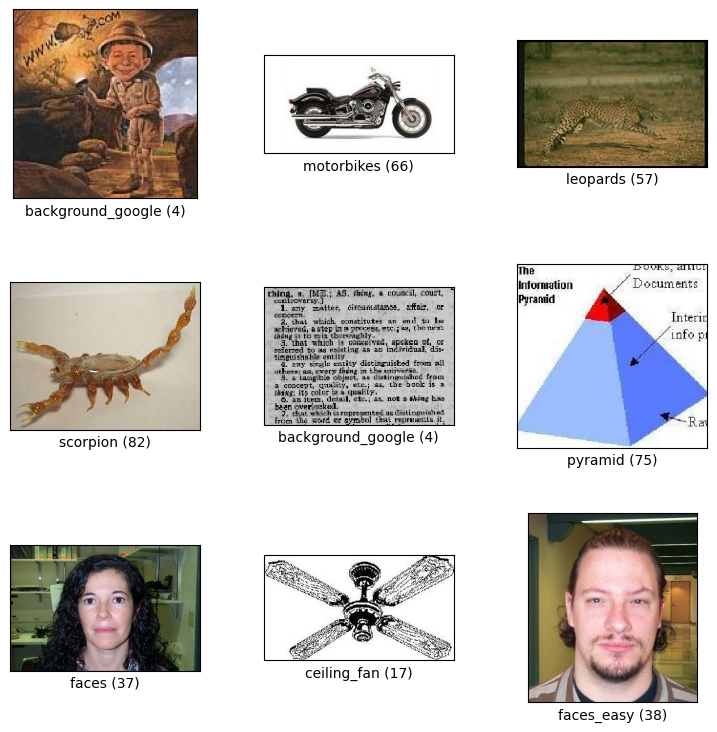

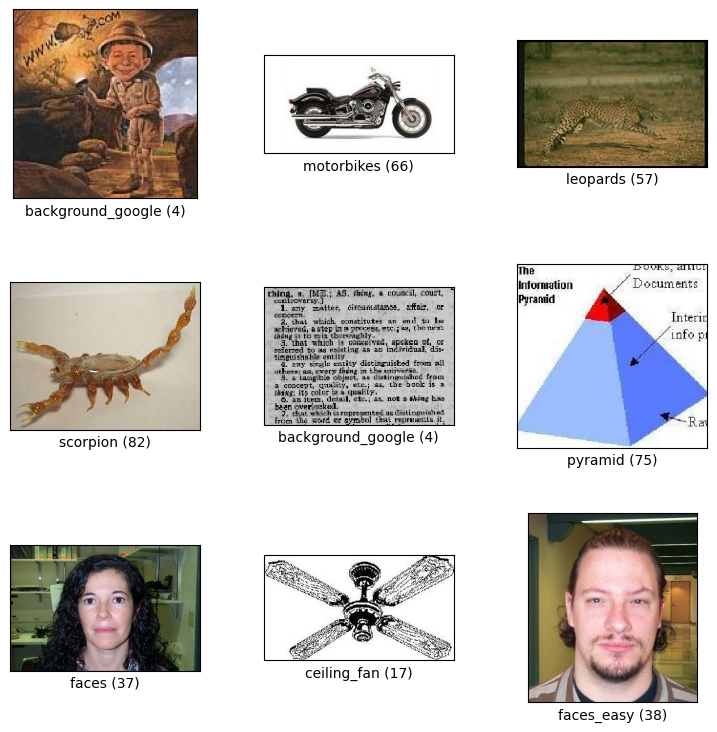

In [5]:
tfds.show_examples(train_data, ds_info)

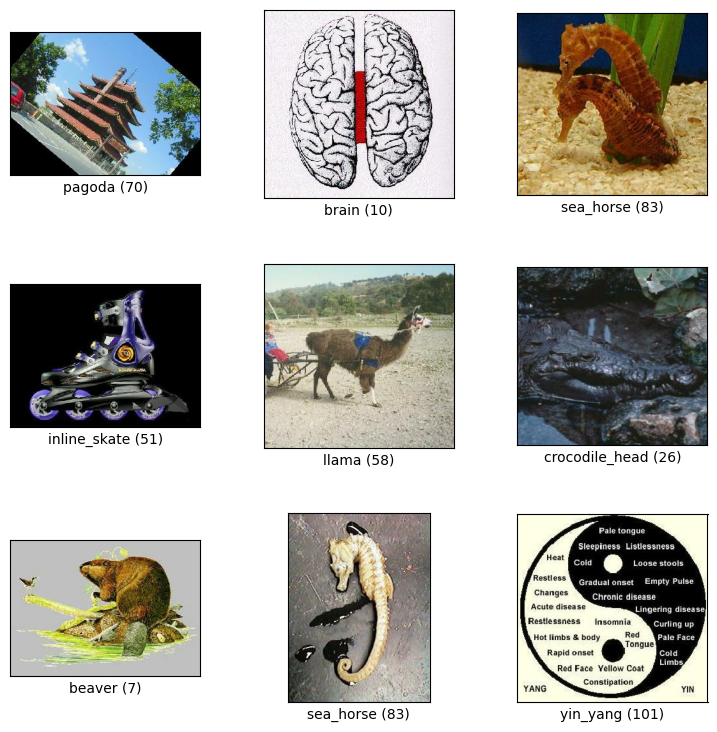

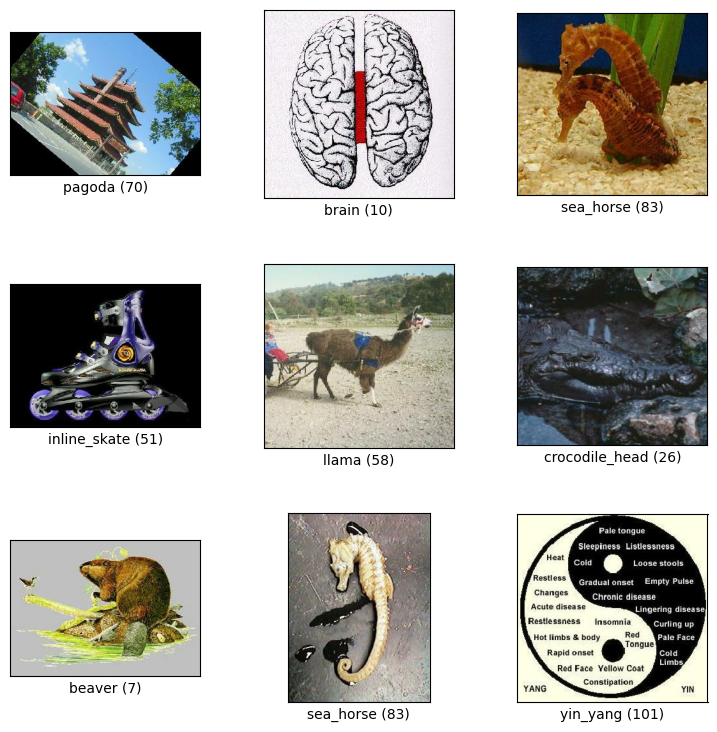

In [6]:
tfds.show_examples(test_data, ds_info)

In [7]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(tf.image.resize(image, (224,224)), tf.float32) / 255., tf.one_hot(label, depth=len(class_names))


In [8]:
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

(224, 224, 3)


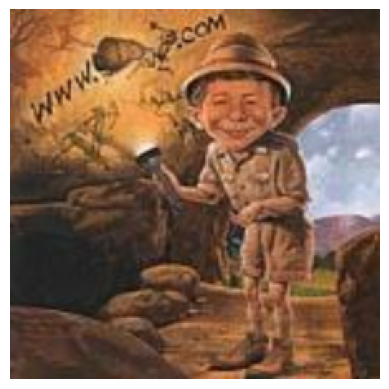

In [9]:
for images, labels in mapped_train_data.take(1):  # Take one batch
    # Select the first image from the batch
    image = images[0]

    # Reshape the image tensor if necessary (remove the batch dimension)
    image = tf.squeeze(image)
    print(image.shape)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

(224, 224, 3)


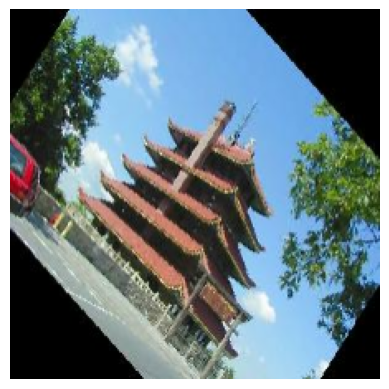

In [10]:
for images, labels in mapped_test_data.take(1):  # Take one batch
    # Select the first image from the batch
    image = images[0]

    # Reshape the image tensor if necessary (remove the batch dimension)
    image = tf.squeeze(image)
    print(image.shape)
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [11]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [12]:
model = Sequential()

#Block 1
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 4
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))

#Block 5
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=(2,2)))


#Output
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(102, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 batch_normalization (Batch  (None, 222, 222, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 128)     1

In [13]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [14]:
history_vgg = model.fit(mapped_train_data,epochs=30, batch_size=32, validation_data=mapped_test_data)

Epoch 1/30
191/191 [==============================] - 144s 611ms/step - loss: 4.6035 - accuracy: 0.3325 - val_loss: 5.9140 - val_accuracy: 0.0118
Epoch 2/30
191/191 [==============================] - 108s 567ms/step - loss: 2.5345 - accuracy: 0.4512 - val_loss: 5.4121 - val_accuracy: 0.0441
Epoch 3/30
191/191 [==============================] - 115s 601ms/step - loss: 2.1236 - accuracy: 0.5064 - val_loss: 4.7169 - val_accuracy: 0.1428
Epoch 4/30
191/191 [==============================] - 109s 571ms/step - loss: 1.7489 - accuracy: 0.5630 - val_loss: 5.4677 - val_accuracy: 0.1761
Epoch 5/30
191/191 [==============================] - 109s 570ms/step - loss: 1.3956 - accuracy: 0.6269 - val_loss: 8.0792 - val_accuracy: 0.1703
Epoch 6/30
191/191 [==============================] - 108s 565ms/step - loss: 1.1465 - accuracy: 0.6880 - val_loss: 12.2585 - val_accuracy: 0.1536
Epoch 7/30
191/191 [==============================] - 115s 600ms/step - loss: 0.9738 - accuracy: 0.7198 - val_loss: 10.0622

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to save the history file in Google Drive
save_path = '/content/drive/My Drive/Deep Learning/VGG/history_vgg_resize.pkl'

# Serialize and save the history object to a file
with open(save_path, 'wb') as file:
    pickle.dump(history_vgg, file)

Mounted at /content/drive


In [ ]:
with open(save_path, 'rb') as f:
    history_vgg = pickle.load(f)

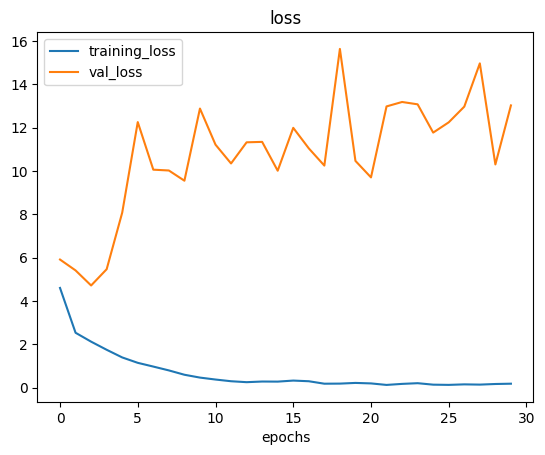

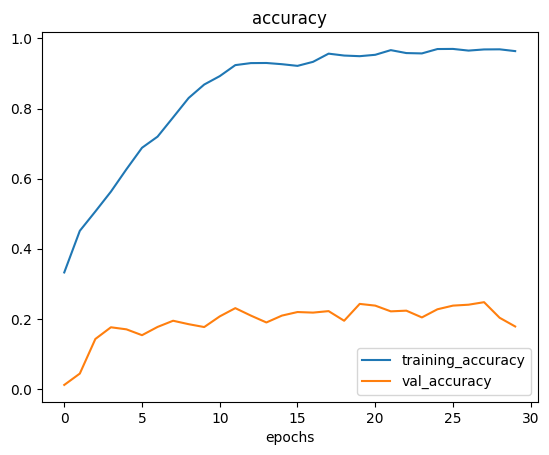

In [17]:
plot_loss_curves(history_vgg)